KeyError: 'results'

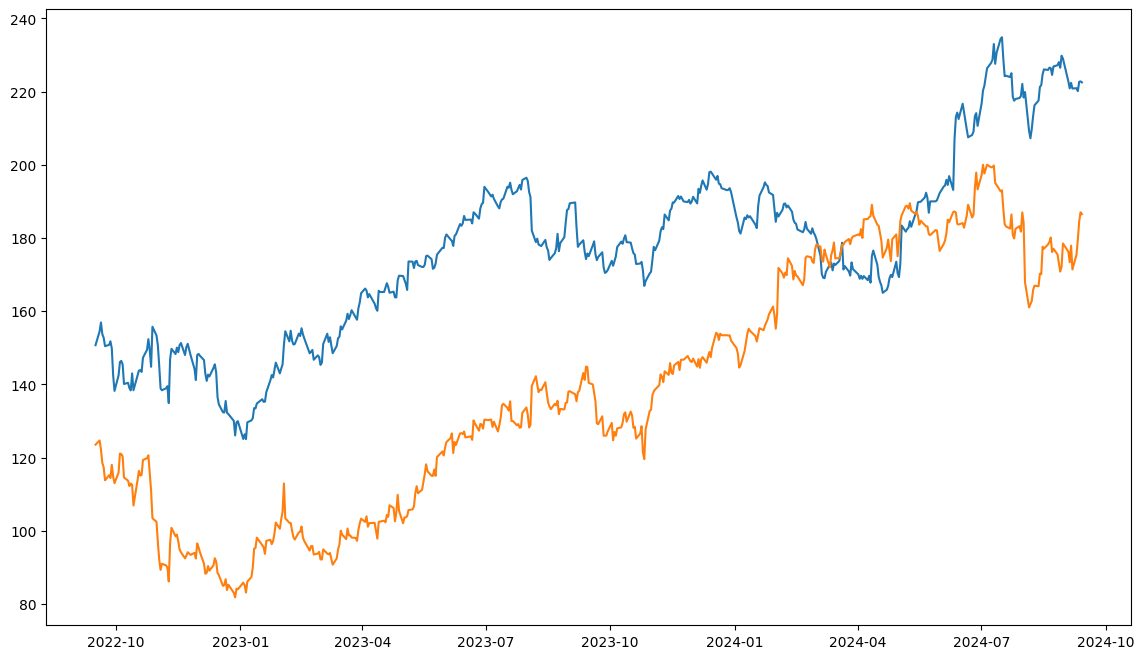

In [2]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

# Folder path where the JSON files are saved
folder_path = 'fetch'

# Tickers and their corresponding names
arrf = ["Apple", "Amazon", "Netflix", "Google ", "Sony"]

# Create a plot for each stock
plt.figure(figsize=(14, 8))

for name in arrf:
    # Load data from JSON file
    file_path = os.path.join(folder_path, f'{name}_stock.json')
    with open(file_path, 'r') as f:
        data = json.load(f)
    
    # Convert JSON data to DataFrame
    df = pd.DataFrame(data['results'])
    df['t'] = pd.to_datetime(df['t'], unit='ms')  # Convert timestamp to datetime
    df.set_index('t', inplace=True)
    
    # Plot the data
    plt.plot(df.index, df['c'], label=name)  # Plot closing prices

# Customize the plot
plt.title('Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)

# Save and show the plot
plt.savefig('stock_prices_plot.png')
plt.show()
